# IST 700: Applied Deep Learning. Homework 2
- Professor: Daniel Acuna
- Underground TA: Lizhen Liang

Save this notebook into your Google Drive. The notebook has appropriate comments at the top of code cells to indicate whether you need to modify them or not. Answer your questions directly in the Notebook. Remember to use the GPU as your runtime. Once finished, download the notebook and submit through Blackboard.

# Question 1 (10 pts)

Explain the differences between convolutional neural networks and multi-layer perceptron. Explain whether the following statement is true "a MLP can represent the same functions as a CNN" and if true, when it could be true.

**You answer here** \
1. MLP has fully connected layers whereas CNN operates input data in parallel, i.e. partially connected. \
  With MLP, a set of neurons receive an input from every neuron on the previous layer. And because of its hierachical structur, we can easily analyze each layer using backpropagation. On the other hand, with CNN model, we apply filter to the entire input image (every pixel) correspond to an identical mathematical operation. And it is because of this opertaion, CNN use weight sharing and each filter uses the same weight. Thus CNN runs in parallel because every neuron has idential weights. 

2. MLP requires much more parameters to train becuase of its hierachical structure with fully connected layers. CNN need fewer parameters. \

"a MLP can represent the same functions as a CNN", this statement may be true when a fully connected layer has input size n x n with m hidden layers, and an n x n CNN layer with m filters. 


# Question 2 (10 pts)

In class, we saw an example of autoencoders being able to remove the noise of an image. Explain why this happens and what the limits of such funcionality are.

**Your answer here** \
The main idea of autoencoder is that it takes the input image, transform it into a lower-dimension with input being compressed into a reduced representation. Autoencoder then will learn from the corrupted version of the input data and extract features that are useful. After that the decoder part will do the reverse of encoder and recontruct the compressed image back to the original image. 

That being said, one of the limitations of autoencoder is that there is no specific criteria for autoencoder to decide the features that are most relevant or most useful. Therefore if the information within the input, only takes a small portion there is a chance that the autoenocder might fail in capturing it. 


# Question 3 (10 pts)

When using transfer learning models, sometimes we get better results by fine-tuning, and some other times we get better results by freezing the parameters before training. Under what circumstances should we fine-tune the model in order to get a better result? And, under what circumstances should we freeze the parameters instead? 



**you answer here** \

One of the circumstances is that if there aren't many target task labels and we want to prevent overfitting, then we should using fine-tuning. Whereas if the target task labels are plentiful, then we can freeze the parameters before training the model. 

# Question 4 (20 pts): MLP vs CNN

Below there are two neural networks for classifying MNIST digits: `model_mlp`  is an MLP with no hidden layers (the smallest possible) with  19,810 parameters. Evaluate the performance of such model below. 

Then, define a convolutional neural network with similar number of parameters and evaluate its performance. Can it do better? Why?

**Answer** \
CNN does slightly better than MLP model. One of the reasons could be, with CNN, images can be better predicted because CNN model takes input as tensor and take spatial element into consideration. However when MLP is analyzing images, it takes input as vector and flatten out everything, disregard the relations among image pixels.

In [ ]:
# DO NOT MODIFY CELL

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model_nlp = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_nlp.summary()

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# DO NOT MODIFY CELL
batch_size = 128
epochs = 15
model_nlp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_nlp.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

Epoch 1/15
422/422 [==============================] - 4s 4ms/step - loss: 0.7126 - accuracy: 0.8255 - val_loss: 0.3513 - val_accuracy: 0.9118
Epoch 2/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3768 - accuracy: 0.8987 - val_loss: 0.2849 - val_accuracy: 0.9262
Epoch 3/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3306 - accuracy: 0.9084 - val_loss: 0.2616 - val_accuracy: 0.9295
Epoch 4/15
422/422 [==============================] - 2s 4ms/step - loss: 0.3096 - accuracy: 0.9144 - val_loss: 0.2489 - val_accuracy: 0.9347
Epoch 5/15
422/422 [==============================] - 1s 4ms/step - loss: 0.2967 - accuracy: 0.9174 - val_loss: 0.2427 - val_accuracy: 0.9362
Epoch 6/15
422/422 [==============================] - 2s 4ms/step - loss: 0.2881 - accuracy: 0.9192 - val_loss: 0.2379 - val_accuracy: 0.9348
Epoch 7/15
422/422 [==============================] - 1s 4ms/step - loss: 0.2814 - accuracy: 0.9222 - val_loss: 0.2346 - val_accuracy: 0.9355
Epoch 

In [ ]:
# DO NOT MODIFY CELL
score = model_nlp.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2657208740711212
Test accuracy: 0.9247000217437744


In [ ]:
# DEFINE YOUR OWN CNN SO THAT THE PARAMETERS ARE FEWER THAN THE MLP
model_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [ ]:
# DO NOT MODIFY CELL
batch_size = 128
epochs = 15
model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_cnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

Epoch 1/15
422/422 [==============================] - 32s 10ms/step - loss: 0.3625 - accuracy: 0.8911 - val_loss: 0.0839 - val_accuracy: 0.9775
Epoch 2/15
422/422 [==============================] - 4s 9ms/step - loss: 0.1157 - accuracy: 0.9641 - val_loss: 0.0657 - val_accuracy: 0.9820
Epoch 3/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0891 - accuracy: 0.9726 - val_loss: 0.0505 - val_accuracy: 0.9847
Epoch 4/15
422/422 [==============================] - 4s 8ms/step - loss: 0.0740 - accuracy: 0.9775 - val_loss: 0.0434 - val_accuracy: 0.9878
Epoch 5/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0657 - accuracy: 0.9798 - val_loss: 0.0381 - val_accuracy: 0.9900
Epoch 6/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0589 - accuracy: 0.9822 - val_loss: 0.0340 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0535 - accuracy: 0.9835 - val_loss: 0.0376 - val_accuracy: 0.9895
Epoc

In [ ]:
# DO NOT MODIFY CELL
score = model_cnn.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.027858126908540726
Test accuracy: 0.9904999732971191


# Question 5 (20 pts): Transfer learning

We are going to classify beans using transfer learning (read more about the dataset [here](https://www.tensorflow.org/datasets/catalog/beans). In the code below, use the `ResNet50` model available in Keras to classify the weed dataset (3 classes). **Do not fine tune `ResNet50`**. What is the performance?

**Answer** \
The model is generating an accuracy of 1.0 using transfer learning. 

In [ ]:
# DO NOT MODIFY CELL
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

## Loading images and labels
(train_ds, train_labels), (test_ds, test_labels) = tfds.load(
    "beans",
    split=["train[:70%]", "train[:30%]"], ## Train test split
    batch_size=-1,
    as_supervised=True  # Include labels
)

## Resizing images
train_ds = tf.image.resize(train_ds, (200, 200))
test_ds = tf.image.resize(test_ds, (200, 200))

## Transforming labels to correct format
train_labels = to_categorical(train_labels, num_classes=3)
test_labels = to_categorical(test_labels, num_classes=3)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteIO9G5V/beans-train.tfrecord


  0%|          | 0/1034 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteIO9G5V/beans-validation.tfrecord


  0%|          | 0/133 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/beans/0.1.0.incompleteIO9G5V/beans-test.tfrecord


  0%|          | 0/128 [00:00<?, ? examples/s]

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.
Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


Instructions for updating:
Use `tf.data.Dataset.get_single_element()`.


In [ ]:
# IMPORT THE APPROPRIATE MODEL HERE
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

## Loading ResNet50 model
base_model = ResNet50(include_top=False, weights="imagenet",input_shape=train_ds[0].shape)
base_model.trainable = False

## Preprocessing input
train_ds = preprocess_input(train_ds) 
test_ds = preprocess_input(test_ds)

from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
prediction_layer = layers.Dense(3, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    layers.Dropout(0.2),
    prediction_layer
])

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# DO NOT MODIFY CELL
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
# DO NOT MODIFY CELL
model.fit(train_ds, train_labels, epochs=5, validation_split=0.2, batch_size=64)

Epoch 1/5
10/10 [==============================] - 12s 709ms/step - loss: 4.9604 - accuracy: 0.5630 - val_loss: 2.8247 - val_accuracy: 0.7724
Epoch 2/5
10/10 [==============================] - 4s 423ms/step - loss: 0.9380 - accuracy: 0.9016 - val_loss: 3.0924 - val_accuracy: 0.8000
Epoch 3/5
10/10 [==============================] - 4s 423ms/step - loss: 0.1737 - accuracy: 0.9793 - val_loss: 2.6984 - val_accuracy: 0.8069
Epoch 4/5
10/10 [==============================] - 4s 424ms/step - loss: 0.0328 - accuracy: 0.9948 - val_loss: 2.7199 - val_accuracy: 0.8138
Epoch 5/5
10/10 [==============================] - 4s 424ms/step - loss: 4.6709e-04 - accuracy: 1.0000 - val_loss: 2.6027 - val_accuracy: 0.8345


In [ ]:
# DO NOT MODIFY CELL
score = model.evaluate(test_ds, test_labels, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.9120590877719223e-05
Test accuracy: 1.0


# Question 6 (30 pts): Autoencoder

Modify the convolutional autoencoder for MNIST we saw in class so that the embedding has the following structure:
- Conv2D: 8 filters, Kernel (3, 3)
- MaxPooling: Size (2, 2)
- Conv2D: 3 filters, Kernel (3, 3)
- MaxPooling: Size (2, 2)
- Conv2D: 1 filters, Kernel (3, 3)

After making this change, you need to change the input size of the encoder function so that it can accept the output of the decoder. What is the performance of your model?

In [ ]:
# DO NOT MODIFY THIS CELL
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense
import numpy as np
import h5py
from pathlib import Path
import matplotlib.pyplot as plt

from keras import backend as keras_backend
keras_backend.set_image_data_format('channels_last')
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, Input, MaxPooling2D, UpSampling2D
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
import h5py

# Data now has a different shape
random_seed = 42
np.random.seed(random_seed)

# load the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
image_height = X_train.shape[1]
image_width = X_train.shape[2]
number_of_pixels = image_height * image_width

# cast the sample data to the current Keras floating-point type
X_train = keras_backend.cast_to_floatx(X_train)
X_test = keras_backend.cast_to_floatx(X_test)

# reshape to 2D grid, one line per image
X_train = X_train.reshape(X_train.shape[0], number_of_pixels)
X_test = X_test.reshape(X_test.shape[0], number_of_pixels)

# scale data to range [0, 1]
X_train /= 255.0
X_test /= 255.0

# reshape sample data to 4D tensor using channels_last convention
X_train = X_train.reshape(X_train.shape[0], image_height, image_width, 1)
X_test = X_test.reshape(X_test.shape[0], image_height, image_width, 1)

# replace label data with one-hot encoded versions
number_of_classes = 1 + max(np.append(y_train, y_test))
y_train = np_utils.to_categorical(y_train, number_of_classes)
y_test = np_utils.to_categorical(y_test, number_of_classes)

In [ ]:
X_train.shape

(60000, 28, 28, 1)

In [ ]:
# MODIFY THE ENCODER BELOW ACCORDING TO THE QUESTION' REQUIREMENTS
CAE_encoder_input=Input(shape=(28,28,1))

CAE_encoder_conv_1 = Conv2D(8, kernel_size=(3,3), activation='relu', padding='same')
CAE_encoder_pool_1 = MaxPooling2D(pool_size=(2,2), padding='same')
CAE_encoder_conv_2 = Conv2D(3, kernel_size=(3,3), activation='relu', padding='same')
CAE_encoder_pool_2 = MaxPooling2D(pool_size=(2,2), padding='same')
CAE_encoder_output = Conv2D(1, kernel_size=(3,3), activation='relu', padding='same')


In [ ]:
# DO NOT CHANGE THIS CELL
CAE_decoder_up_1 = UpSampling2D((2,2))
CAE_decoder_conv_1 = Conv2D(8, (3, 3), activation='relu', padding='same')
CAE_decoder_up_2 = UpSampling2D((2,2))
CAE_decoder_output = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

CAE_encoder_step_1 = CAE_encoder_conv_1(CAE_encoder_input)
CAE_encoder_step_2 = CAE_encoder_pool_1(CAE_encoder_step_1)
CAE_encoder_step_3 = CAE_encoder_conv_2(CAE_encoder_step_2)
CAE_encoder_step_4 = CAE_encoder_pool_2(CAE_encoder_step_3)
CAE_encoder_step_5 = CAE_encoder_output(CAE_encoder_step_4)

CAE_decoder_step_1 = CAE_decoder_up_1(CAE_encoder_step_5)
CAE_decoder_step_2 = CAE_decoder_conv_1(CAE_decoder_step_1)
CAE_decoder_step_3 = CAE_decoder_up_2(CAE_decoder_step_2)
CAE_decoder_step_4 = CAE_decoder_output(CAE_decoder_step_3)


Conv_AE = Model(CAE_encoder_input, CAE_decoder_step_4)
Conv_AE.compile(optimizer='adam', loss='binary_crossentropy')


Conv_AE_encoder_only_model = Model(CAE_encoder_input, CAE_encoder_step_5)

In [ ]:
# MODIFY THE INPUT FOR THE DECODER BELOW ACCORDING TO THE OUTPUT EXPECTED OF THE DECODER
#CAE_encoder_step_5

Conv_AE_decoder_only_input = Input(shape=(7,7,1))

In [ ]:
# DO NOT MODIFY THIS CELL
Conv_AE_decoder_only_step_1 = CAE_decoder_up_1(Conv_AE_decoder_only_input)
Conv_AE_decoder_only_step_2 = CAE_decoder_conv_1(Conv_AE_decoder_only_step_1)
Conv_AE_decoder_only_step_3 = CAE_decoder_up_2(Conv_AE_decoder_only_step_2)
Conv_AE_decoder_only_step_4 = CAE_decoder_output(Conv_AE_decoder_only_step_3)
                      
Conv_AE_decoder_only_model = Model(Conv_AE_decoder_only_input, Conv_AE_decoder_only_step_4)

In [ ]:
# DO NOT MODIFY THIS CELL
# FIT AND EVALUATE PERFORMANCE
Conv_AE.fit(X_train, X_train,
               epochs=50, batch_size=128, shuffle=True,
               verbose=2,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 - 4s - loss: 0.2573 - val_loss: 0.1659
Epoch 2/50
469/469 - 3s - loss: 0.1515 - val_loss: 0.1386
Epoch 3/50
469/469 - 3s - loss: 0.1342 - val_loss: 0.1293
Epoch 4/50
469/469 - 3s - loss: 0.1284 - val_loss: 0.1253
Epoch 5/50
469/469 - 3s - loss: 0.1251 - val_loss: 0.1225
Epoch 6/50
469/469 - 3s - loss: 0.1223 - val_loss: 0.1197
Epoch 7/50
469/469 - 3s - loss: 0.1191 - val_loss: 0.1164
Epoch 8/50
469/469 - 3s - loss: 0.1165 - val_loss: 0.1143
Epoch 9/50
469/469 - 3s - loss: 0.1148 - val_loss: 0.1129
Epoch 10/50
469/469 - 3s - loss: 0.1136 - val_loss: 0.1119
Epoch 11/50
469/469 - 3s - loss: 0.1127 - val_loss: 0.1111
Epoch 12/50
469/469 - 3s - loss: 0.1119 - val_loss: 0.1104
Epoch 13/50
469/469 - 3s - loss: 0.1113 - val_loss: 0.1098
Epoch 14/50
469/469 - 3s - loss: 0.1108 - val_loss: 0.1094
Epoch 15/50
469/469 - 3s - loss: 0.1103 - val_loss: 0.1089
Epoch 16/50
469/469 - 3s - loss: 0.1100 - val_loss: 0.1086
Epoch 17/50
469/469 - 3s - loss: 0.1096 - val_loss: 0.1083
Epoch 

In [ ]:
# DO NOT MODIFY THIS CELL
def draw_predictions_set(predictions, filename=None):
    plt.figure(figsize=(8, 4))
    for i in range(5):
        plt.subplot(2, 5, i+1)
        plt.imshow(X_test[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.subplot(2, 5, i+6)
        plt.imshow(predictions[i].reshape(28, 28), vmin=0, vmax=1, cmap="gray")
        ax = plt.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()    
    plt.show()

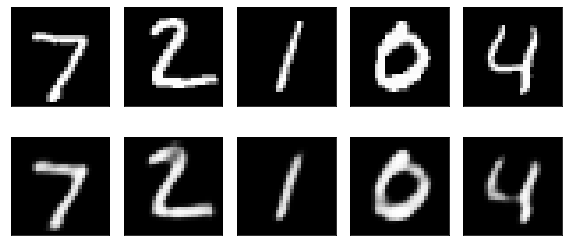

In [ ]:
# Test your new predictions
Conv_predictions = Conv_AE.predict(X_test)
draw_predictions_set(Conv_predictions, 'NB3-ConvAE-predictions')